<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_Course_Probability_Primer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STATISTICS AND PROBABILITY :FUNDAMENTALS

In [6]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px



Probability


In [9]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(2, 6+1, number_of_tosses))

In [7]:
results = toss_coin()
print(results.value_counts())
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

Heads    59
Tails    41
Name: count, dtype: int64


**Derived Probability Distributions:**


let's create a scenario where we simulate tossing a fair coin 100 times and then analyze the probability distribution of the outcomes. Here's how you can do it:




In [12]:
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))
results = toss_coin(100)
probability_distribution = results.value_counts(normalize=True)
fig = pg.Figure(data=[pg.Bar(x=probability_distribution.index, y=probability_distribution.values)])
fig.update_layout(title="Probability Distribution of Coin Tosses",
                  xaxis_title="Outcome",
                  yaxis_title="Probability")
fig.show()

**Regression to the Mean**

Question:
Suppose you are conducting an experiment to estimate the average score of students on a difficult test. You initially select a small sample of 10 students and find that their average score is significantly lower than the expected average score based on historical data. What can you infer from this observation, and what steps would you take to improve the accuracy of your estimate?

To improve the accuracy of our estimate, we should consider increasing the sample size.

In [32]:
import numpy as np

# Simulate student scores on a difficult test
historical_data = np.random.randint(60, 100, 1000)
expected_mean = np.mean(historical_data)


sample_size = 10
initial_sample = np.random.choice(historical_data, size=sample_size, replace=False)
initial_sample_mean = np.mean(initial_sample)


if initial_sample_mean < expected_mean:
    print("The initial sample mean is lower than the expected mean based on historical data.")
    print("This observation suggests the possibility of 'Regression to the Mean'.")


    larger_sample_size = 100
    larger_sample = np.random.choice(historical_data, size=larger_sample_size, replace=False)
    larger_sample_mean = np.mean(larger_sample)
    print(f"Average score from larger sample of {larger_sample_size} students: {larger_sample_mean}")

    if larger_sample_mean > initial_sample_mean:
        print("The average score from the larger sample has regressed towards the expected mean.")
    else:
        print("Regression to the mean did not occur. More samples may be needed for accurate estimation.")

else:
    print("The initial sample mean is not significantly lower than the expected mean.")
    print("More samples may be needed to draw conclusions about regression to the mean.")


The initial sample mean is not significantly lower than the expected mean.
More samples may be needed to draw conclusions about regression to the mean.


QUESTIONS

1.If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.

The probability that a randomly drawn card is a numbered card (2-10) is: 0.69


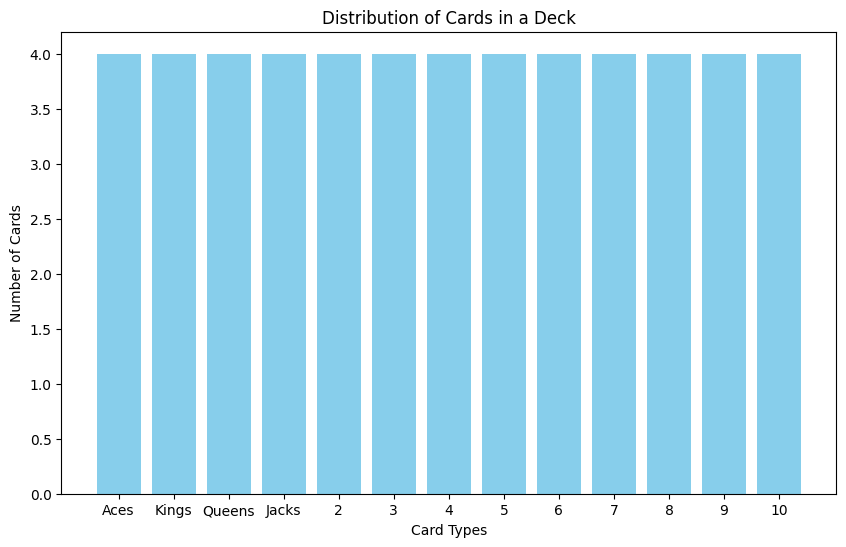

In [14]:

total_cards = 52
aces = 4
kings = 4
queens = 4
jacks = 4
numbered_cards_per_type = 4
numbered_cards = 9 * numbered_cards_per_type
probability_numbered = numbered_cards / total_cards
print(f"The probability that a randomly drawn card is a numbered card (2-10) is: {probability_numbered:.2f}")
card_types = ['Aces', 'Kings', 'Queens', 'Jacks'] + [str(i) for i in range(2, 11)]
counts = [aces, kings, queens, jacks] + [numbered_cards_per_type] * 9
plt.figure(figsize=(10, 6))
plt.bar(card_types, counts, color='skyblue')
plt.xlabel('Card Types')
plt.ylabel('Number of Cards')
plt.title('Distribution of Cards in a Deck')
plt.show()


2.In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.



The probability that both drawn cards are numbered cards is: 0.4793


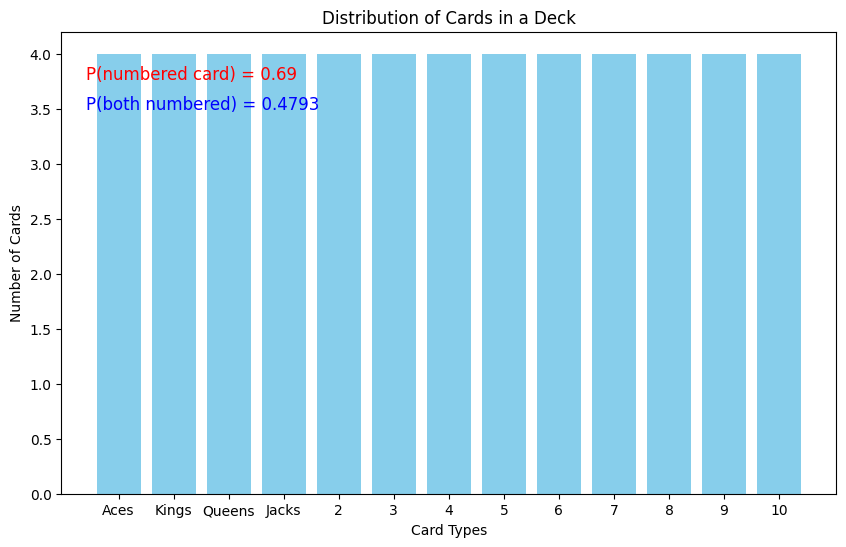

In [16]:
total_cards = 52
aces = 4
kings = 4
queens = 4
jacks = 4
numbered_cards_per_type = 4  # Each of 2, 3, ..., 10
numbered_cards = 9 * numbered_cards_per_type
probability_numbered = numbered_cards / total_cards
probability_both_numbered = probability_numbered ** 2
print(f"The probability that both drawn cards are numbered cards is: {probability_both_numbered:.4f}")
card_types = ['Aces', 'Kings', 'Queens', 'Jacks'] + [str(i) for i in range(2, 11)]
counts = [aces, kings, queens, jacks] + [numbered_cards_per_type] * 9
plt.figure(figsize=(10, 6))
plt.bar(card_types, counts, color='skyblue')
plt.xlabel('Card Types')
plt.ylabel('Number of Cards')
plt.title('Distribution of Cards in a Deck')
plt.figtext(0.15, 0.8, f'P(numbered card) = {probability_numbered:.2f}', fontsize=12, color='red')
plt.figtext(0.15, 0.75, f'P(both numbered) = {probability_both_numbered:.4f}', fontsize=12, color='blue')
plt.show()

now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.

In [17]:
import math

total_cards = 52
numbered_cards = 36

total_ways = math.comb(total_cards, 2)
numbered_ways = math.comb(numbered_cards, 2)

probability = numbered_ways / total_ways

gcd = math.gcd(numbered_ways, total_ways)
simplified_numerator = numbered_ways // gcd
simplified_denominator = total_ways // gcd

print(f"Probability: {probability}")
print(f"Simplified fraction: {simplified_numerator}/{simplified_denominator}")


Probability: 0.4751131221719457
Simplified fraction: 105/221


Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.




To find the probability that the bottom card of the cut is a numbered card, we need to count how many positions in the deck (from 1 to 52) correspond to numbered cards, and then divide this by the total number of possible cut positions (52).

In [18]:
def probability_of_numbered_card_cut():

    total_cards = 52


    numbered_cards_per_suit = 9


    num_suits = 4


    total_numbered_cards = numbered_cards_per_suit * num_suits


    probability = total_numbered_cards / total_cards

    return probability

# Calculate the probability
probability = probability_of_numbered_card_cut()
print("Probability that the bottom card of your cut is a numbered card:", probability)


Probability that the bottom card of your cut is a numbered card: 0.6923076923076923


Simulating to compute Expectation


Question: You toss a fair coin until you get heads. What is the expected number of tosses until you get heads?

In [19]:
import random

def toss_coin():
    return random.choice(['H', 'T'])

def simulate_expected_tosses():
    num_tosses = 0
    while toss_coin() != 'H':
        num_tosses += 1
    return num_tosses + 1
num_trials = 1000000
total_tosses = sum(simulate_expected_tosses() for _ in range(num_trials))
expected_tosses = total_tosses / num_trials
print("Expected number of tosses until getting heads:", expected_tosses)


Expected number of tosses until getting heads: 1.998793


Mathematics ofProbability

# Conditional Probability

Question on Conditional Probability:
Suppose you have a bag containing red and blue balls. The probability of drawing a red ball is 0.6, and the probability of drawing a blue ball is 0.4. Additionally, if you draw a red ball, the probability of drawing another red ball on the next draw is 0.7. However, if you draw a blue ball, the probability of drawing a red ball on the next draw is 0.5.

Probability of drawing a red ball:
𝑃
(
𝑅
)
=
0.6
P(R)=0.6
Probability of drawing a blue ball:
𝑃
(
𝐵
)
=
0.4
P(B)=0.4
Probability of drawing a red ball after drawing a red ball:
𝑃
(
𝑅
∣
𝑅
)
=
0.7
P(R∣R)=0.7
Probability of drawing a red ball after drawing a blue ball:
𝑃
(
𝑅
∣
𝐵
)
=
0.5
P(R∣B)=0.5
To find: Probability of drawing two red balls consecutively
𝑃
(
𝑅
∩
𝑅
)
P(R∩R).

Solution:
We can find
𝑃
(
𝑅
∩
𝑅
)
P(R∩R) using conditional probability. We know that:

𝑃
(
𝑅
∩
𝑅
)
=
𝑃
(
𝑅
∣
𝑅
)
×
𝑃
(
𝑅
)
P(R∩R)=P(R∣R)×P(R)
Since the probability of drawing a red ball after drawing a red ball is 0.7 and the probability of drawing a red ball initially is 0.6, we have:

𝑃
(
𝑅
∩
𝑅
)
=
0.7
×
0.6
=
0.42
P(R∩R)=0.7×0.6=0.42
So, the probability of drawing two red balls consecutively is 0.42.

This solution relies on the definition of conditional probability and the multiplication rule of probability. It's important to note the conditions under which each probability applies and how they are combined to find the desired outcome.

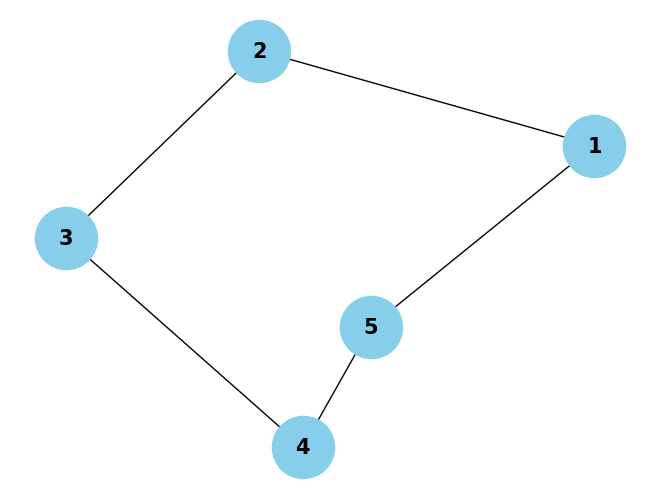

In [20]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5])
G.add_edge(1, 2)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)
G.add_edge(5, 1)
nx.draw(G, with_labels=True, node_color='skyblue', node_size=2000, font_size=15, font_weight='bold')

plt.show()


***ASSIGNMENT QUESTIONS***
In a survey among few people, 60% read Hindi newspaper, 40% read English newspaper
and 20% read both. If a person is chosen at random and if he already reads English
newspaper find the probability that he also reads Hindi newspaper.

In [22]:
def conditional_probability(hindi_and_english, english):
    return hindi_and_english / english

hindi_and_english = 0.20
english = 0.40

probability_hindi_given_english = conditional_probability(hindi_and_english, english)

print("Probability of reading Hindi newspaper given that they already read English newspaper:", probability_hindi_given_english)


Probability of reading Hindi newspaper given that they already read English newspaper: 0.5


2.You are given a set of cards numbered from 1 to 15. You choose two cards at random
such that the sum of the numbers on the cards is even. What is the probability that both
the cards you chose have odd numbers?


calculates the probability by considering the number of ways to choose two odd-numbered cards out of the 15 cards, given that their sum is even, and then divides it by the total number of ways to choose two cards.

In [23]:
def probability_odd_odd(sum_even):
    total_even = sum_even // 2  # Number of even numbers <= sum_even/2
    total_odd = 15 - total_even  # Number of odd numbers <= 15 - total_even
    odd_odd = total_odd * (total_odd - 1)  # Number of ways to choose 2 odd numbers
    total_ways = 15 * 14  # Total number of ways to choose 2 cards
    return odd_odd / total_ways

sum_even = sum(i for i in range(1, 16) if i % 2 == 0)  # Sum of even numbers from 1 to 15
probability = probability_odd_odd(sum_even)
print("Probability that both cards chosen have odd numbers, given that the sum of the numbers on the cards is even:", probability)


Probability that both cards chosen have odd numbers, given that the sum of the numbers on the cards is even: 0.8666666666666667


3.3. Let E and F be events of an experiment such that P(E) = 3/10, P(F) = ½, P(F|E) = 2/5.
Find:
i. P(E ∩ F)
ii. P(E|F)
iii. P(E U F)


In [24]:
# Given probabilities
prob_e = 3 / 10
prob_f = 1 / 2
prob_f_given_e = 2 / 5

# i. P(E ∩ F)
intersection_prob = prob_f_given_e * prob_e
print("i. P(E ∩ F):", intersection_prob)

# ii. P(E|F)
conditional_prob_e_given_f = intersection_prob / prob_f
print("ii. P(E|F):", conditional_prob_e_given_f)

# iii. P(E U F)
union_prob = prob_e + prob_f - intersection_prob
print("iii. P(E U F):", union_prob)


i. P(E ∩ F): 0.12
ii. P(E|F): 0.24
iii. P(E U F): 0.68


# **Bayes' Theorem**

Problem:
A clinic offers a test for a certain disease. The test is 99% accurate, meaning that it correctly identifies a person with the disease 99% of the time, and it correctly identifies a person without the disease 99% of the time. However, only 1% of the population actually has the disease.


In [21]:
def bayes_theorem(prior_prob_a, prob_b_given_a, prob_b_given_not_a):

    prob_b = (prob_b_given_a * prior_prob_a) + (prob_b_given_not_a * (1 - prior_prob_a))


    posterior_prob_a = (prob_b_given_a * prior_prob_a) / prob_b

    return posterior_prob_a


prior_prob_a = 0.01
prob_b_given_a = 0.99
prob_b_given_not_a = 0.01


posterior_prob_a = bayes_theorem(prior_prob_a, prob_b_given_a, prob_b_given_not_a)

# Print the result
print("Probability of actually having the disease given a positive test result:", posterior_prob_a)


Probability of actually having the disease given a positive test result: 0.5


2.Three persons A, B and C have applied for a job in a private company. The chance of
their selections is in the ratio 1 : 2 : 4. The probabilities that A, B and C can introduce
changes to improve the profits of the company are 0.8, 0.5 and 0.3, respectively. If the
change does not take place, find the probability that it is due to the appointment of C.

𝐴
A: Person A is selected for the job.
𝐵
B: Person B is selected for the job.
𝐶
C: Person C is selected for the job.
𝐼
I: Introducing change to improve profits.
The chance of selection for A, B, and C is in the ratio 1:2:4.
The probabilities that A, B, and C can introduce changes to improve profits are 0.8, 0.5, and 0.3, respectively.

In [27]:

prob_change_A = 0.8
prob_change_B = 0.5
prob_change_C = 0.3


prob_no_change_A = 1 - prob_change_A
prob_no_change_B = 1 - prob_change_B
prob_no_change_C = 1 - prob_change_C


ratio_A = 1
ratio_B = 2
ratio_C = 4


total_ratio = ratio_A + ratio_B + ratio_C


prob_select_A = ratio_A / total_ratio
prob_select_B = ratio_B / total_ratio
prob_select_C = ratio_C / total_ratio


prob_no_change_given_A = prob_no_change_A * prob_select_A
prob_no_change_given_B = prob_no_change_B * prob_select_B
prob_no_change_given_C = prob_no_change_C * prob_select_C

prob_no_change = prob_no_change_given_A + prob_no_change_given_B + prob_no_change_given_C


prob_selection_C = prob_select_C


prob_no_change_given_C_total = 1 - prob_no_change_given_C


prob_no_change_due_to_C = (prob_no_change_given_C_total * prob_no_change) / prob_selection_C

print("Probability that if the change does not take place, it is due to the appointment of C:", prob_no_change_due_to_C)


Probability that if the change does not take place, it is due to the appointment of C: 0.6000000000000001


3.A new virus test has been developed. The test’s accuracy is as follows:
If a person is infected, the test correctly identifies it with probability P(T|I) = 0.98.
If a person is not infected, the test incorrectly identifies them as infected with probability
P(T|N) = 0.03.
The overall prevalence of the virus in the population is 1%.
If a person tests positive, what is the probability that they are actually infected?

Let's define the following events:

𝐼
I: The person is infected.
𝑁
N: The person is not infected.
𝑇
T: The person tests positive for the virus.
Given:

𝑃
(
𝑇
∣
𝐼
)
=
0.98
P(T∣I)=0.98 (Probability of testing positive given the person is infected).
𝑃
(
𝑇
∣
𝑁
)
=
0.03
P(T∣N)=0.03 (Probability of testing positive given the person is not infected).
The overall prevalence of the virus in the population is 1%, which means
𝑃
(
𝐼
)
=
0.01
P(I)=0.01.
We need to find
𝑃
(
𝐼
∣
𝑇
)
P(I∣T), the probability that a person is infected given that they tested positive.

Using Bayes' Theorem:
𝑃
(
𝐼
∣
𝑇
)
=
𝑃
(
𝑇
∣
𝐼
)
×
𝑃
(
𝐼
)
𝑃
(
𝑇
)
P(I∣T)=
P(T)
P(T∣I)×P(I)
​



In [29]:
# Given probabilities
prob_infected = 0.01
prob_not_infected = 1 - prob_infected
prob_positive_given_infected = 0.98
prob_positive_given_not_infected = 0.03


prob_positive = (prob_positive_given_infected * prob_infected) + (prob_positive_given_not_infected * prob_not_infected)


prob_infected_given_positive = (prob_positive_given_infected * prob_infected) / prob_positive

print("Probability that a person is infected given that they tested positive:", prob_infected_given_positive)


Probability that a person is infected given that they tested positive: 0.24810126582278486


4.There are three identical cards except that both the sides of the first card are coloured red,
both sides of the second card are coloured blue and for the third card one side is coloured
red and the other side is blue. One card is randomly selected from these three cards and
put down and the visible side of the card is red. What is the probability that the other side
is blue?

To solve this problem, let's analyze the possibilities:

If the red side is facing up, then the card must be either the first or the third card, because both sides of the second card are blue.
If the card is the first one (both sides red), then the other side must be red.
If the card is the third one (one side red, one side blue), then the other side must be blue.
Since each card is equally likely to be chosen, the probability of selecting each card is
1
3
3
1
​
 .

Therefore, the probability that the other side is blue, given that the visible side is red, is the probability that the third card is chosen, which is
1
3
3
1
​
 .

So, the probability that the other side is blue is
1
3
3
1
​
 .



In [31]:
def probability_other_side_blue():

    total_cards = 3


    blue_one_side = 1


    prob_blue_one_side = blue_one_side / total_cards

    return prob_blue_one_side

probability_blue_other_side = probability_other_side_blue()
print("Probability that the other side is blue:", probability_blue_other_side)


Probability that the other side is blue: 0.3333333333333333
